# Abschlussprüfung Modul 12 - Heart Failure Clinical Records Dataset - Machine Learning Analyse

## 1. Einleitung und Zielsetzung

In diesem Notebook wird der **Heart Failure Clinical Records Dataset** aus dem UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records) analysiert.

### 1.1 Wahl des Verfahrens
**Supervised Learning**
- Zielvariable ist bekannt (label)
- Klassifikation, Regression
- Lernen aus den vorhandenen Daten die Zielvariable für neue Daten vorherzusagen

**Unsupervised Learning**
- Zielvariable nicht bekannt
- Clustering
- Erkennen von Strukturen oder Mustern in Daten

**Forschungsfrage**
- Welche klinischen Merkmale sind mit einer erhöhten Mortalität bei Herzinsuffizienzpatienten assoziiert?
- *Was in den klinischen Merkmalen sagt uns, ob der Patient verstirbt oder überlebt?*

Das gewählte Verfahren ist Supervised Learning, da Zielvariable bekannt (verstorben oder überlebt) ist. Bei Unsupervised Learning könnte man bspw. mit Clustering Subgruppen bilden, jedoch wird die Forschungsfrage damit nicht exakt beantwortet.

**Datensatzbeschreibung**
- **299 Patienten** mit Herzinsuffizienz
- **Features:** 13 Features wie Alter, Geschlecht, klinische Parameter
- **Zielvariable:** `DEATH_EVENT` (0 = überlebt, 1 = verstorben)
- **Arten von Variablen:** numerisch, kategorial (binär)

---

## 2. Datenvorverarbeitung (Preprocessing)

### 2.1 Laden des Datensatzes und erste Exploration

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, silhouette_score

df = pd.read_csv('data\\heart_failure_clinical_records_dataset.csv', sep=',', encoding='utf-8')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Gibt die Dimensionen des Datensatzes an
df.shape

(299, 13)

In [4]:
# Prüft, wie viele fehelende Werte vorhanden sind
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# Liefert grundlegende statistische Größen
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


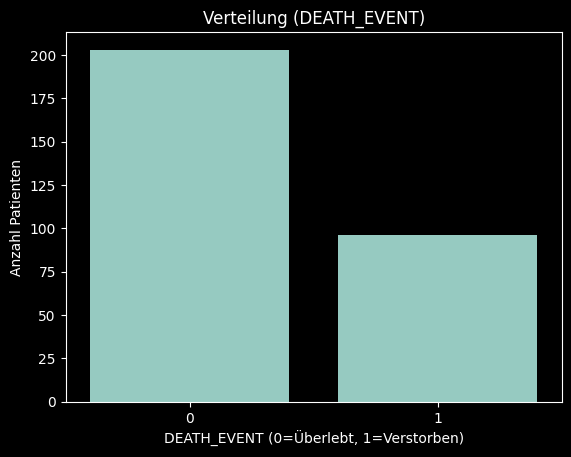

In [31]:
sns.countplot(x=df["DEATH_EVENT"])
plt.title("Verteilung (DEATH_EVENT)")
plt.xlabel("DEATH_EVENT (0=Überlebt, 1=Verstorben)")
plt.ylabel("Anzahl Patienten")
plt.show()

### 2.2 Z-Transformation

Jedes Feature wird skaliert (*Mittelwert = 0 , Standardabweichung = 1*). Speziell distanzbasierte ML Algorithmen sind empfindlich gegenüber unterschiedlich skalierten Features (*age 40 - 95 , serum_creatinine 0.5-9*). Die Gewichtung würde für Alter höher ausfallen, wenn keine Standardisierung stattfinden würde.

In [ ]:
# features
x = df.drop(["DEATH_EVENT","time"], axis=1)

#kat. ausnehmen

# Zielvariable
y = df["DEATH_EVENT"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
x_scaled

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.50403612e+00,  7.35688190e-01, -6.87681906e-01],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -1.41976151e-01,  7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
        -1.73104612e+00,  7.35688190e-01,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
         3.12043840e-01, -1.35927151e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.66063830e-01,  7.35688190e-01,  1.45416070e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
        -1.41976151e-01,  7.35688190e-01,  1.45416070e+00]],
      shape=(299, 11))

---

## 3. Supervised Learning

Wir werden nun Supervised Learning Algorithmen anwenden, um die Zielvariable `DEATH_EVENT` vorherzusagen.

### 3.1 Logistische Regression

Das Modell lernt, welche Gewichtung jede Eingabevariable auf die Zielvariable hat. Mit Hilfe dieser Koeffizienten können dann die Odds Ratios berechnet werden.

(+) einfaches lineares Modell mit guter Interpretierbarkeit (Odds Ratios / Koeffizienten)

(+) gut für Klassifikationsaufgaben

(+) geringer Datenbedarf


(-) nur für lineare Zusammenhänge geeignet

In [19]:
# Datensatz in Trainings- und Testdaten aufteilen
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

#class_weight='balanced'
logreg = LogisticRegression()

# Trainieren des Modells
logreg.fit(x_train, y_train)

# Vorhersagen der Zielvariable
y_pred = logreg.predict(x_test)

# Wahrscheinlichkeit für Klasse 1 = verstorben
y_prob = logreg.predict_proba(x_test)[:,1]

# Berechnung der Genauigkeit der Vorhersagen
accuracy_logreg = accuracy_score(y_test, y_pred)

# Berechnung der Genauigkeit bei Schwellenwerten
roc_auc_logreg = roc_auc_score(y_test, y_prob)

# Berechnung der Konfusionsmatrix (Welche Fehler macht das Modell?)
conf_matrix_logreg = confusion_matrix(y_test, y_pred)

#### Odds Ratio

In [20]:
#Gewichtung
coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

features = x.columns  

odds_df = pd.DataFrame({
    'feature': features,
    'Odds Ratio': odds_ratios
})

odds_df = odds_df.sort_values(by='Odds Ratio', ascending=False)

odds_df

,feature,Odds Ratio
7,serum_creatinine,2.364370
0,age,2.155364
2,creatinine_phosphokinase,1.238662
1,anaemia,1.169807
5,high_blood_pressure,1.138712
10,smoking,1.119923
3,diabetes,1.068862
8,serum_sodium,0.816254
6,platelets,0.815501
9,sex,0.684535


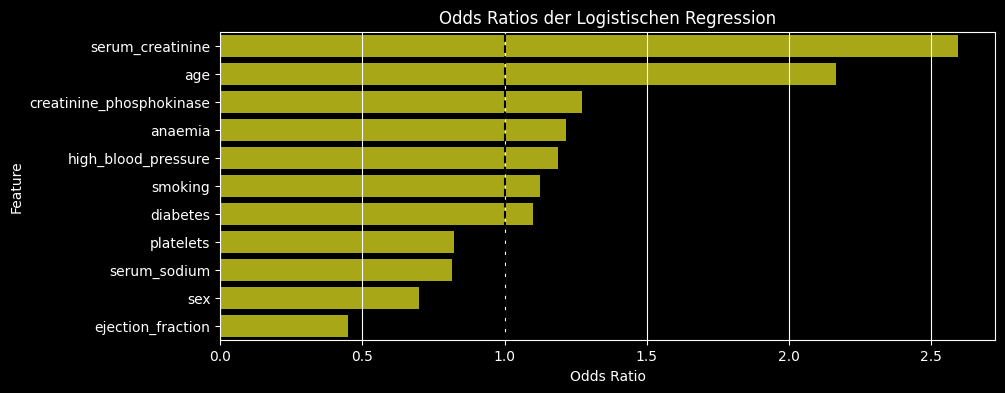

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(x='Odds Ratio', y='feature', data=odds_df, color='y')
plt.axvline(1, color='black', linestyle='--')
plt.title("Odds Ratios der Logistischen Regression")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

#### Modellbewertung

Accuracy: 0.67
ROC AUC: 0.74
Recall für Verstorbene: 0.35


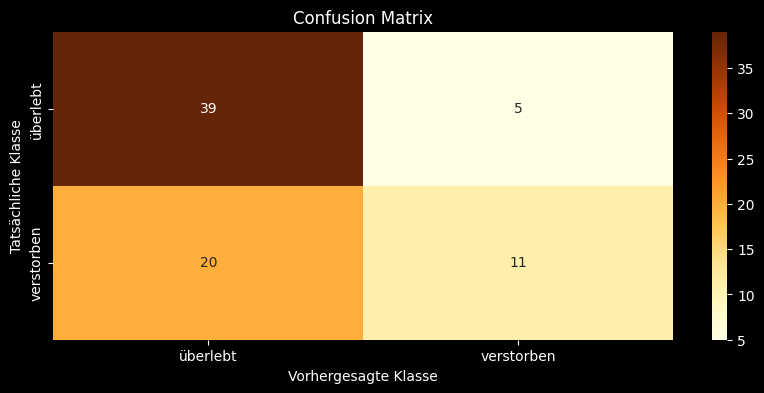

In [39]:
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"ROC AUC: {roc_auc_logreg:.2f}")
print(f"Recall für Verstorbene: {recall:.2f}")

plt.figure(figsize=(10,4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['überlebt', 'verstorben'],
            yticklabels=['überlebt', 'verstorben'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix')
plt.show()

#### Interpretation

**Accuracy**

Es wurden 67% der Patienten korrekt klassifiziert. 

**ROC AUC**

Die Fläche unter der ROC-Kurve (Receiver Operating Characteristic Curve) mit 74% bedeutet, dass in 74% der Fälle zwischen einen zufällig gewählten verstorbenen Patienten und einem überlebendem Patienten unterschieden werden kann.
In der Medizin spricht man im Bereich von 70% bis 90% von einem moderaten AUC-Wert (Area Under the Curve).

**Confusion Matrix**

TN (tatsächlich überlebt als überlebt erkannt) = 39

FP (tatsächlcih überlebt als verstorben erkannt) = 5

FN (tatsächlich verstorben als überlebt erkannt) = 20       (**kritisch**)

TP (tatsächlich verstorben als verstorben erkannt) = 11 

### 3.2 Random Forest Classifier

Bei einem Random Forest werden mehrere Entscheidungsbäume (Serie aus Ja/Nein-Fragen mit Klasse am Ende eines Blattes) miteinander kombiniert, um dem Overfitting entgegenzuwirken. 

- Ensemble aus vielen Entscheidungsbäumen; jeder Baum wird mit einem zufälligem Subset der Daten trainiert
- Mehrheitsvotum der Bäume wird für die finale Vorhersage verwendet
- Sehr robust durch die Zufallsselektion von Daten und Features und Kombination mehrere Bäume
- Geeignet für komplexe, nicht-lineare Zusammenhänge


In [27]:
# Random Forest mit Anzahl der Entscheidungsbäume (je mehr Bäume, desto stabiler)
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, min_samples_split=10, max_depth=5, random_state=42, class_weight='balanced')

# Fünffache Cross Validation (4 Teile als Training, 1 Teil als Test)
cv_scores_rf = cross_val_score(rf, x_scaled, y, cv=5)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:,1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(x_train, y_train)

print("Beste Parameter:", grid_rf.best_params_)
print("Beste ROC AUC:", grid_rf.best_score_)

Beste Parameter: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Beste ROC AUC: 0.8186259305210918


**Feature Importance**

Für jedes Feature wird eine Wichtigkeit (Importance) berechnet. Der Wert liegt zwischen 0 und 1 und gibt an, wie wichtig das Feature für die Klassifikation war.

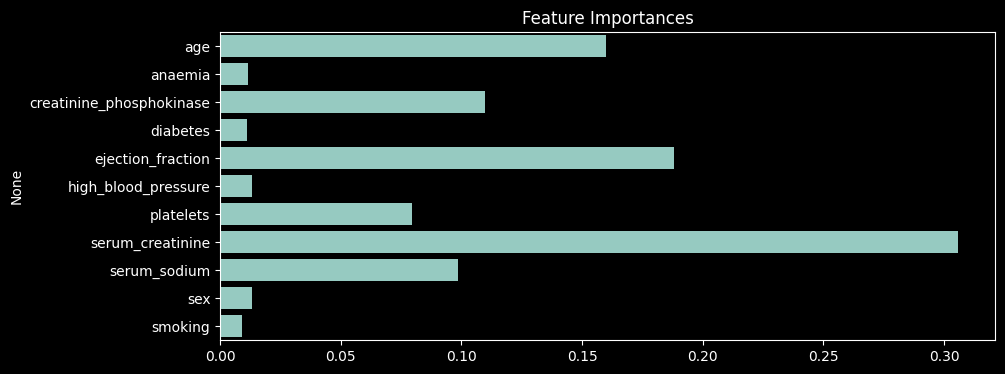

In [46]:
importances = rf.feature_importances_
features = df.drop(["DEATH_EVENT","time"], axis=1).columns

plt.figure(figsize=(10,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

#### Modellbewertung

Accuracy: 0.65
ROC AUC: 0.79
Recall für Verstorbene: 0.48


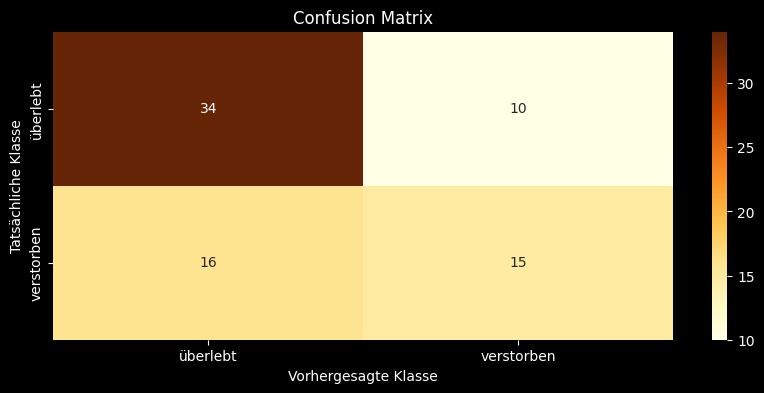

In [44]:
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")
print(f"Recall für Verstorbene: {recall_rf:.2f}")

plt.figure(figsize=(10,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['überlebt', 'verstorben'],
            yticklabels=['überlebt', 'verstorben'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix')
plt.show()

### 3.3 Vergleich Recall beider Verfahren

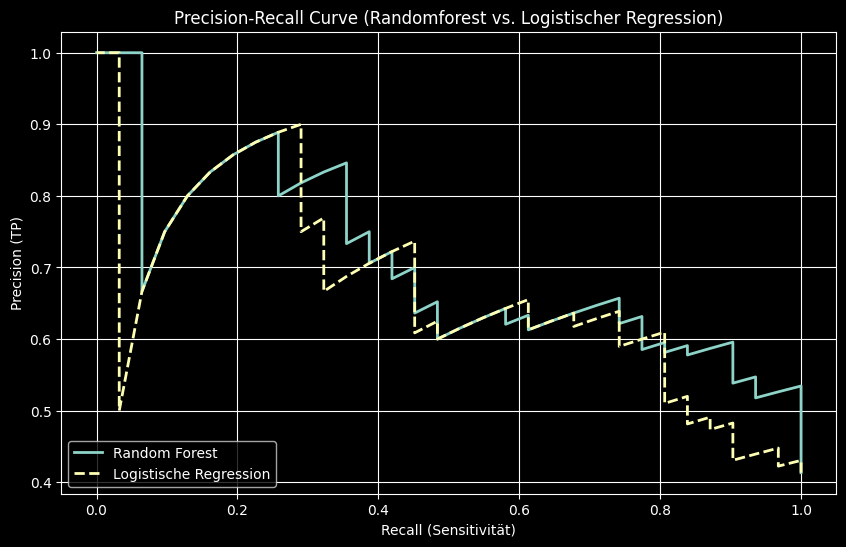

In [47]:
# Berechne Precision-Recall für RF
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_prob_rf)

# Berechne Precision-Recall für LogReg
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10,6))
plt.plot(recall_rf, precision_rf, label='Random Forest', linewidth=2)
plt.plot(recall_logreg, precision_logreg, label='Logistische Regression', linewidth=2, linestyle='--')

plt.title('Precision-Recall Curve (Randomforest vs. Logistischer Regression)')
plt.xlabel('Recall (Sensitivität)')
plt.ylabel('Precision (TP)')
plt.legend(loc='lower left')
plt.grid()
plt.show()

Recall (=Sensitvität) bedeutet in unserem Fall, wie viele der tatsächlich verstorbenen Patienten erkannt werden. (True Positive)

Precision drückt aus, wie viele der als vorhergesagter verstorbener Patienten wirklich verstorben sind. (TP / (TP + FP))